# Nitrogen Oxides(NOx) Level Analysis in Air Quality  

### Attribute Information:

0 Date	(DD/MM/YYYY)<br>
1 Time	(HH.MM.SS) <br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) <br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)<br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) <br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) <br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	<br>
7 True hourly averaged NOx concentration in ppb (reference analyzer) <br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) <br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	<br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)<br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) <br>
12 Temperature in Â°C	<br>
13 Relative Humidity (%) <br>
14 AH Absolute Humidity <br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('AirQualityUCI.csv', delimiter=";",decimal=",")

In [3]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [5]:
data = data.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [6]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
data.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [8]:
data.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [11]:
if 'Date' in data.columns and 'Time' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)


    data.set_index('Datetime', inplace=True)


    data.dropna(inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)

print(type(data.index))

<class 'pandas.core.indexes.base.Index'>


In [12]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [13]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S').dt.hour
type(data['Time'][0])

<ipython-input-13-70c58d89b189>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(data['Time'][0])


numpy.int32

In [14]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
10/03/2004,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 10/03/2004 to 04/04/2005
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int32  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(13), int32(1)
memory usage: 1.0+ MB


In [16]:
data.describe()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


<Axes: >

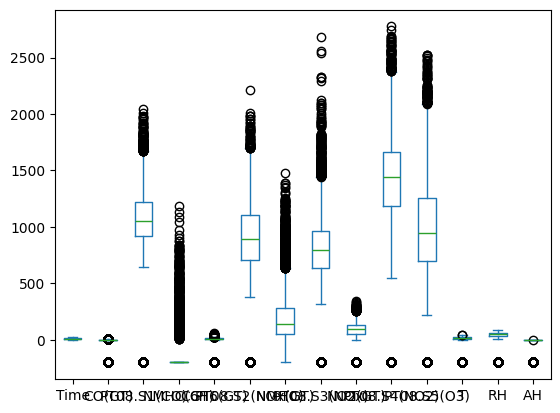

In [17]:
data.plot.box()

In [18]:
data.apply(lambda x : x == -200).sum()

,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


In [19]:
data.drop('NMHC(GT)', axis=1, inplace=True)

In [21]:
data.replace(to_replace=-200, value= np.nan, inplace= True)

In [ ]:
data.apply(lambda x:x==-200).sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [22]:
data.apply(lambda x:x<0).sum()

,0
Time,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [ ]:
data.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [23]:
def filling_null_by_mean(col):
    data[col] = data.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))    #filling missing(NaN) values by mean of same dates

In [24]:
column_list = data.columns[1:]

for i in column_list:
    filling_null_by_mean(i)


In [25]:
data.fillna(method='ffill', inplace= True)   #replace all NaN elements in columns with 0,1,2,3

<ipython-input-25-f65210464059>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace= True)   #replace all NaN elements in columns with 0,1,2,3


In [26]:
data.isnull().any()

,0
Time,False
CO(GT),False
PT08.S1(CO),False
C6H6(GT),False
PT08.S2(NMHC),False
NOx(GT),False
PT08.S3(NOx),False
NO2(GT),False
PT08.S4(NO2),False
PT08.S5(O3),False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 10/03/2004 to 04/04/2005
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int32  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int32(1)
memory usage: 1.2+ MB


In [28]:
data.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.082589,1099.748224,10.050981,937.915962,239.419651,835.378257,109.382418,1449.952952,1026.513193,18.167474,49.288300,1.018346
std,6.923182,1.383347,215.205784,7.368172,264.142162,200.833596,253.425632,46.058214,344.209200,398.438298,8.833685,17.200755,0.403606
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.100000,939.000000,4.500000,734.000000,102.000000,663.000000,76.000000,1223.000000,736.000000,11.500000,36.123529,0.727600
50%,11.000000,1.700000,1065.000000,8.200000,908.000000,177.000000,807.476190,103.608696,1454.000000,966.000000,17.600000,49.600000,0.988100
75%,18.000000,2.700000,1226.647059,14.000000,1118.000000,316.000000,967.000000,135.000000,1662.000000,1275.000000,24.300000,62.500000,1.309917
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Exploratory Data Analysis (EDA)

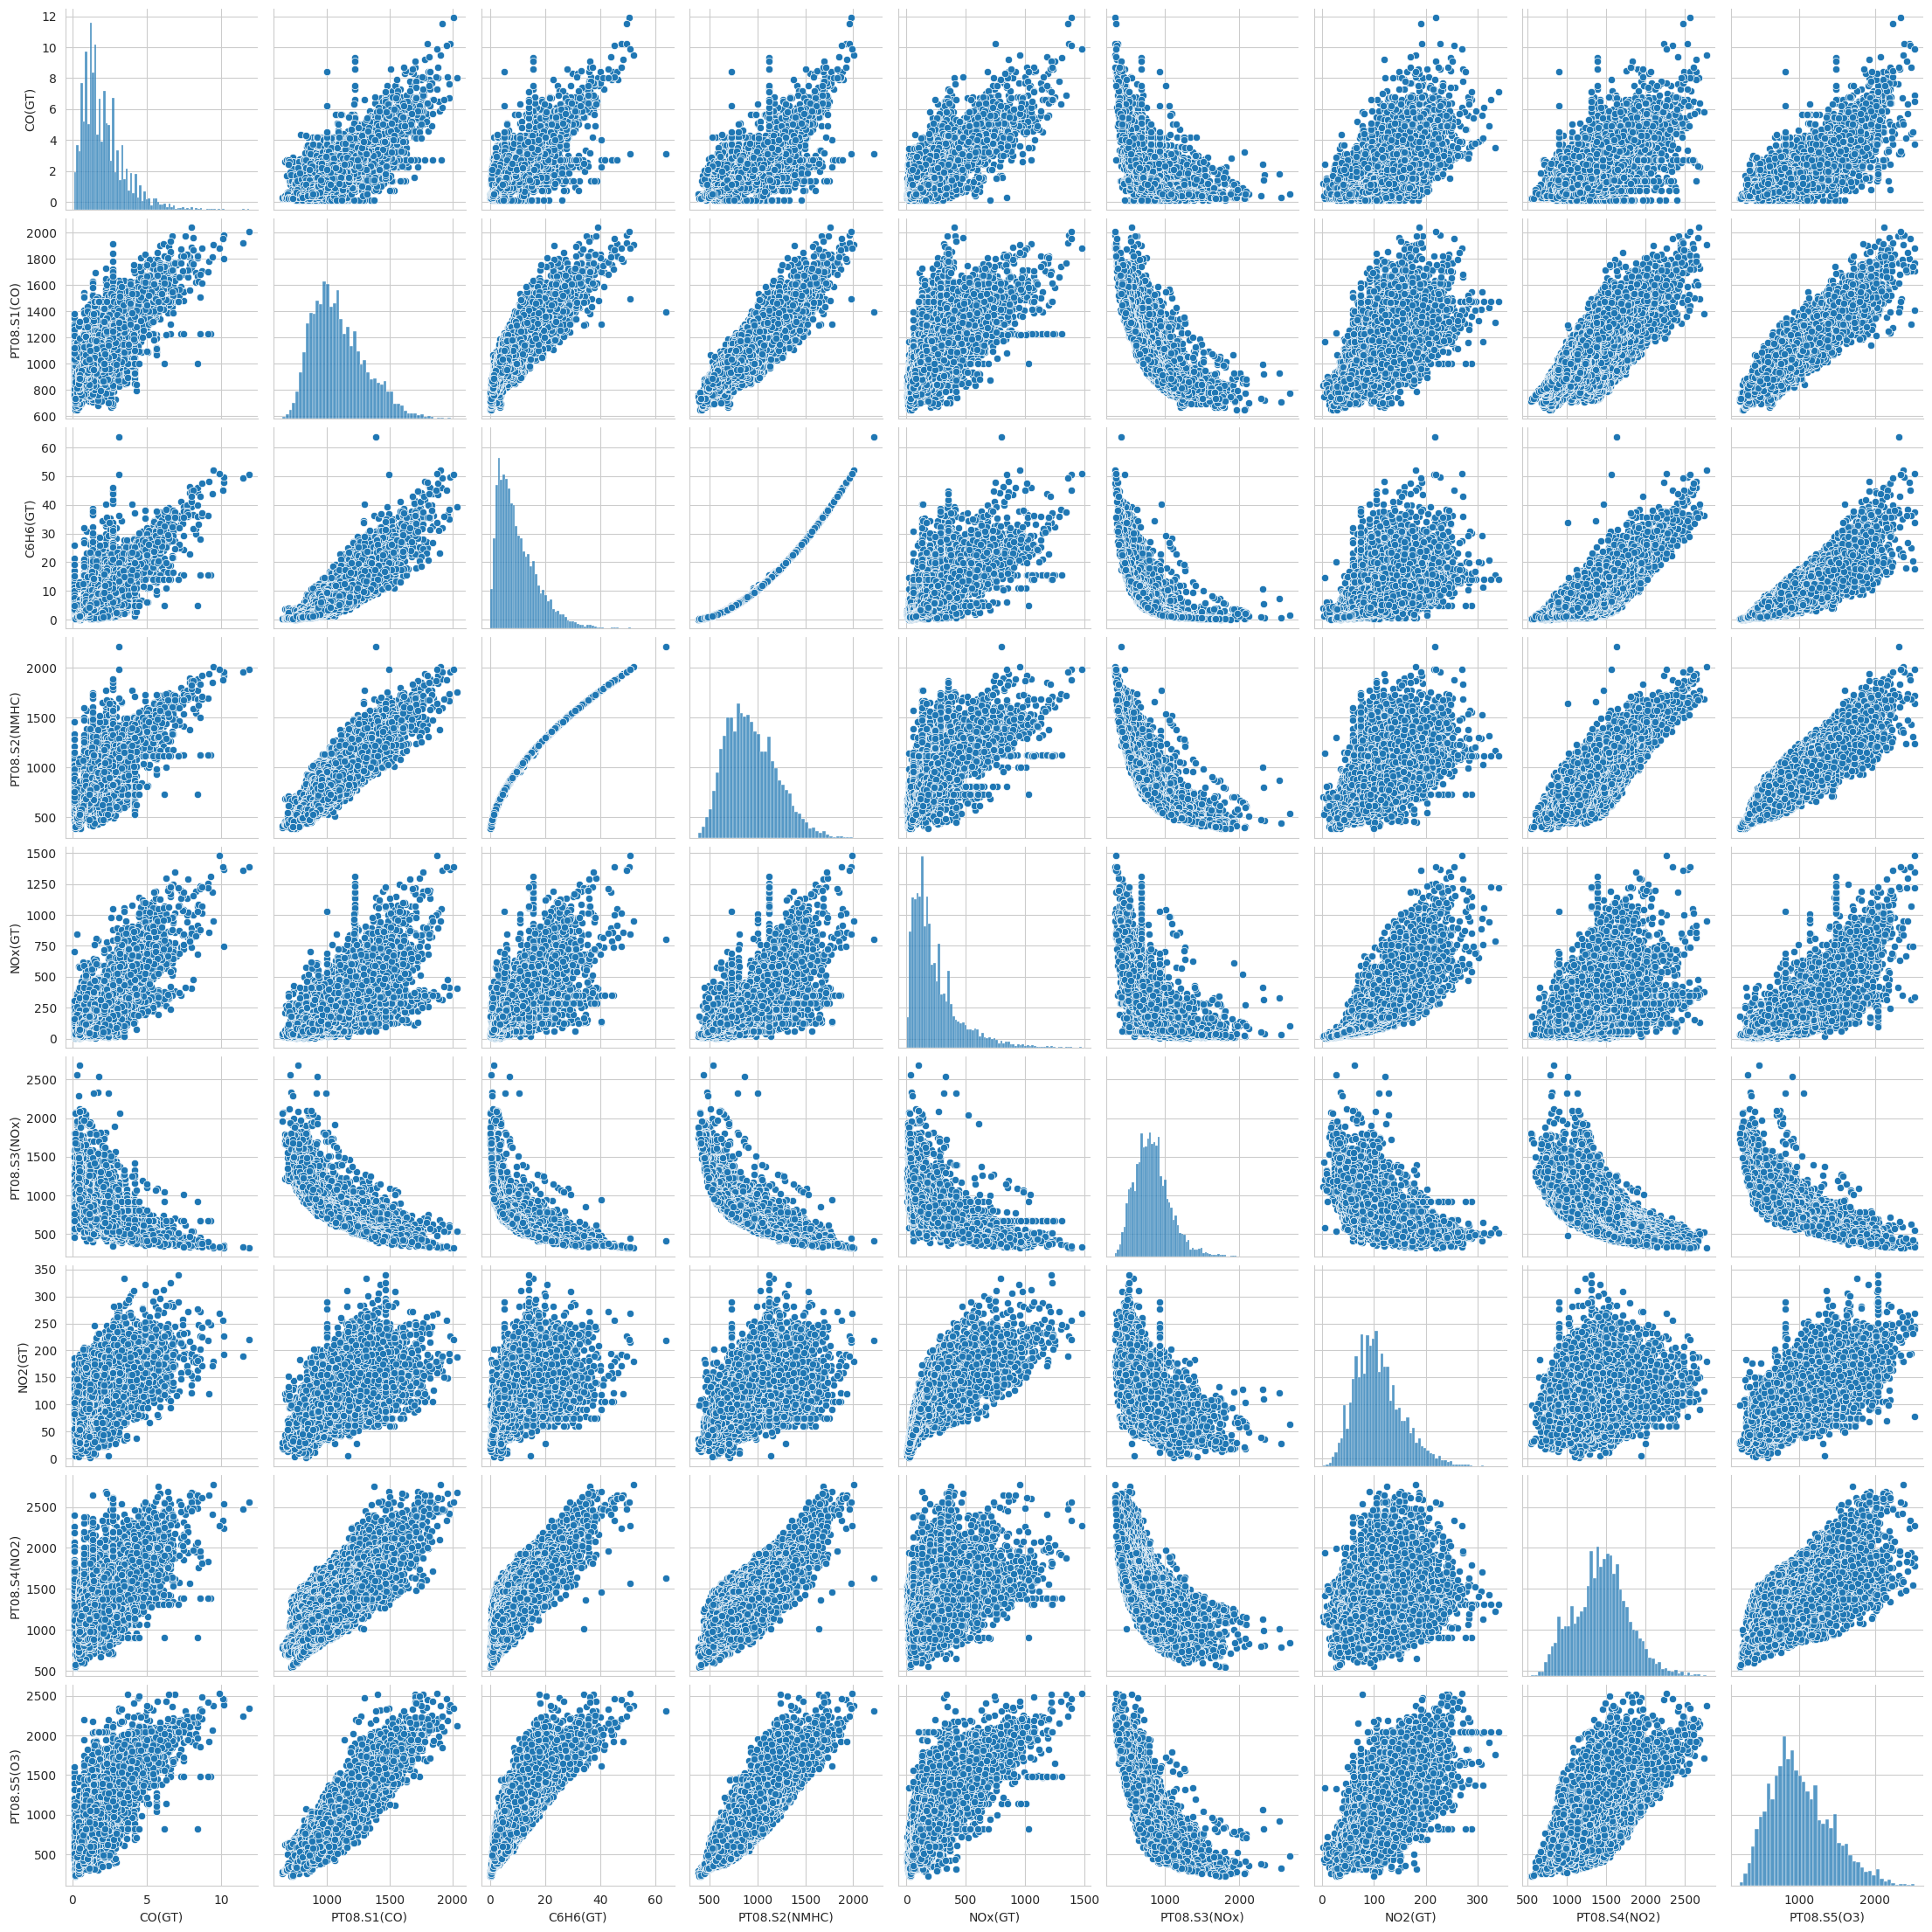

In [29]:
sns.set_style('whitegrid')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)

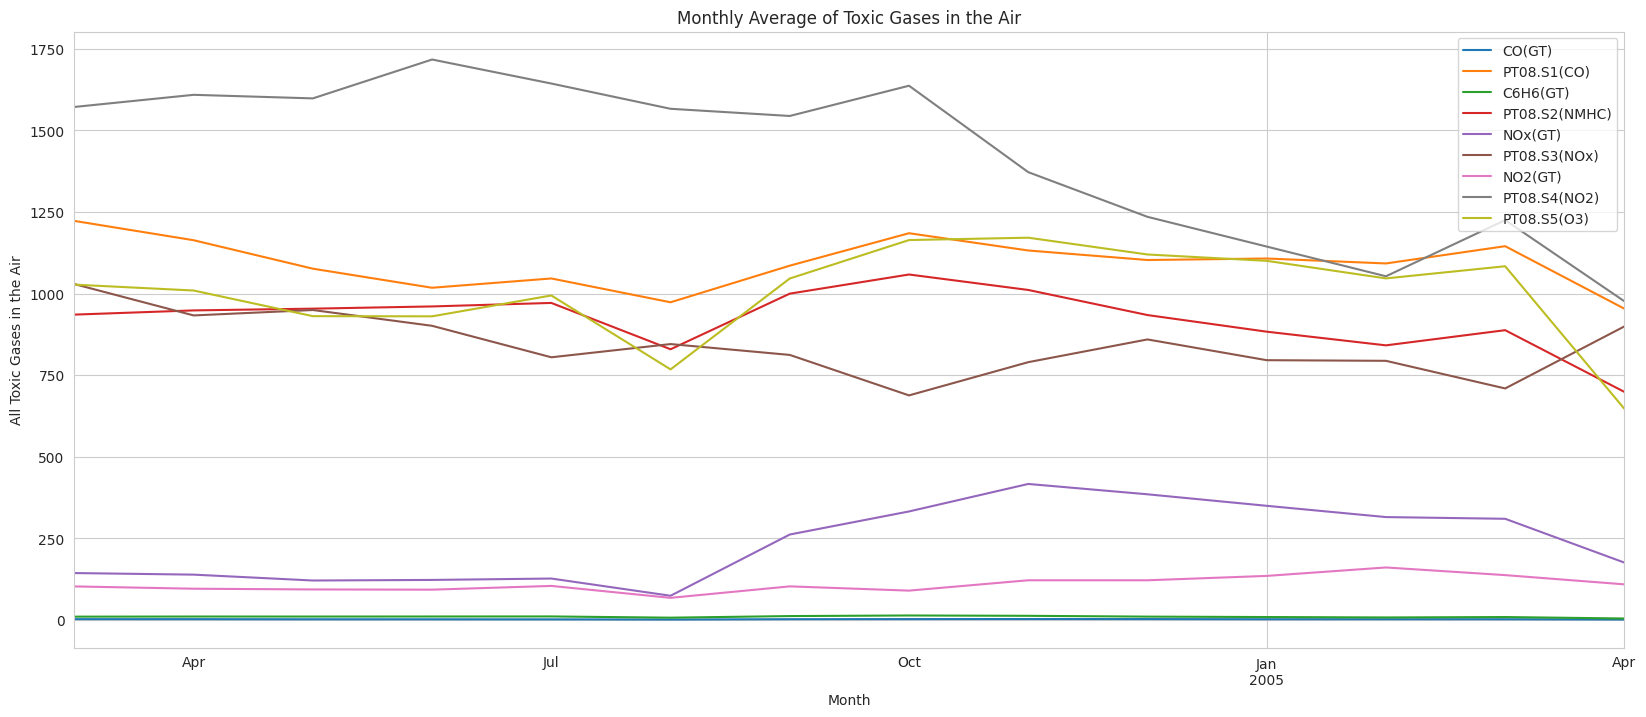

In [35]:
if 'Date' not in data.columns:
    data.index = pd.to_datetime(data.index, dayfirst=True)
else:
    data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
    data.set_index('Date', inplace=True)

data.drop(['Time', 'RH', 'AH', 'T'], axis=1).resample('MS').mean().plot(figsize=(20, 8))

plt.legend(loc='upper right')
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("Monthly Average of Toxic Gases in the Air")
plt.show()

This graph illustrates the frequency of various toxic compounds commonly found in polluted air.
The second-to-last line represents Nitrogen Oxides (NOx), while the last line shows Nitrogen Dioxide (NO₂), which is a component of NOx.

NOx refers to a group of gases composed of nitrogen and oxygen. Among these, Nitric Oxide (NO) and Nitrogen Dioxide (NO₂) are the most toxicologically significant.
I chose to focus on Nitrogen Oxides (NOx) because they are among the most harmful pollutants and are highly relevant in the context of air pollution.

There are several other indicators of air pollution—such as PM10 (particulate matter between 2.5 and 10 microns), carbon monoxide, sulfur dioxide, ozone (O₃), and more—but NOx plays a particularly critical role.

NOx is primarily formed by the reaction of nitrogen and oxygen during high-temperature combustion processes.
Urban areas with dense motor vehicle traffic are major sources, contributing significantly to atmospheric NOx levels.

The major sources of NOx emissions include:

Fossil fuel combustion: ~44% from transportation and ~21% from stationary sources like power plants

Industrial activities: such as nitric acid production, welding, and the use of explosives

Beyond environmental harm, NOx has serious health implications. High exposure levels can cause airway inflammation and worsen respiratory conditions.
Long-term exposure can reduce lung function, increase susceptibility to respiratory illnesses, and intensify allergic responses.
Additionally, NOx contributes to the formation of fine particulate matter (PM) and ground-level ozone, both of which are associated with adverse health effects.

In [37]:
data.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

<ipython-input-38-99d1ace383fd>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))


Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level by Month')

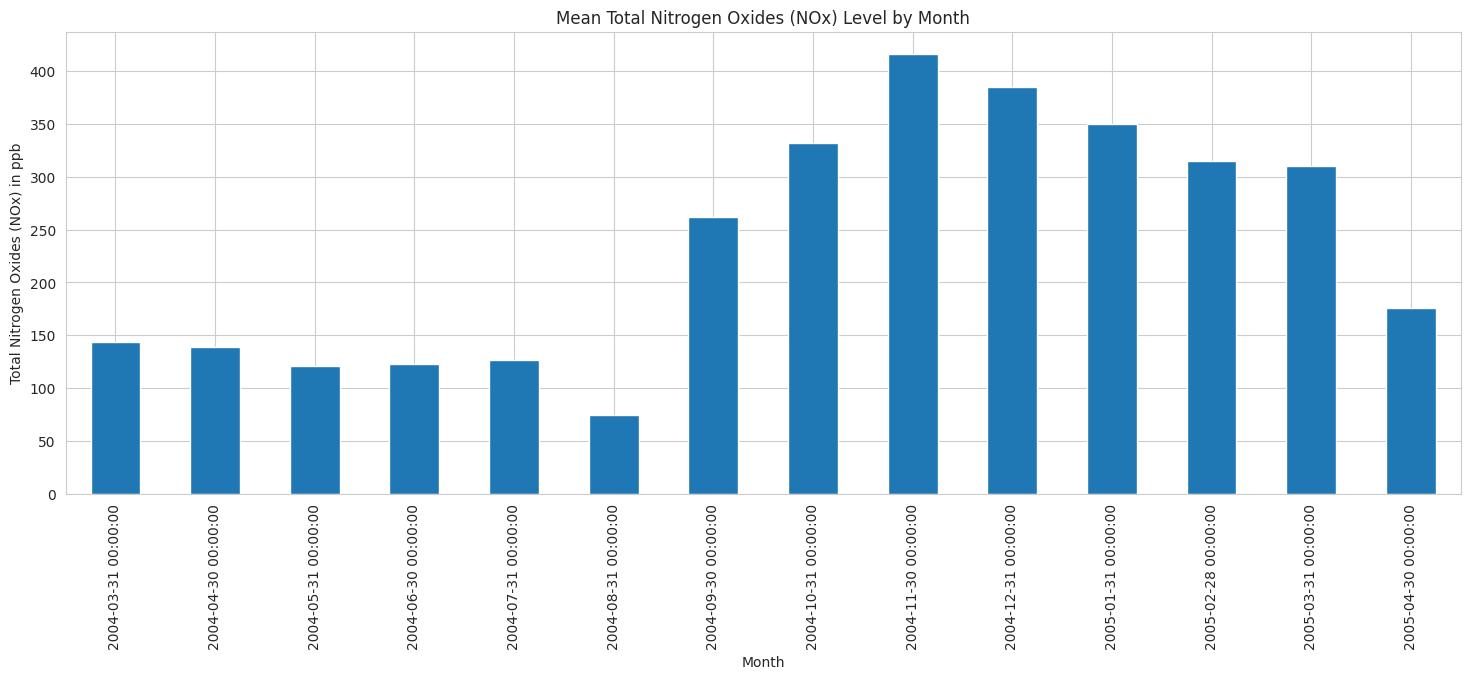

In [38]:
data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level by Month")

Here, we can see that frequency of Oxides of Nitrogen is increasing with little changes.

<ipython-input-39-d23372d69ee6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)


Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

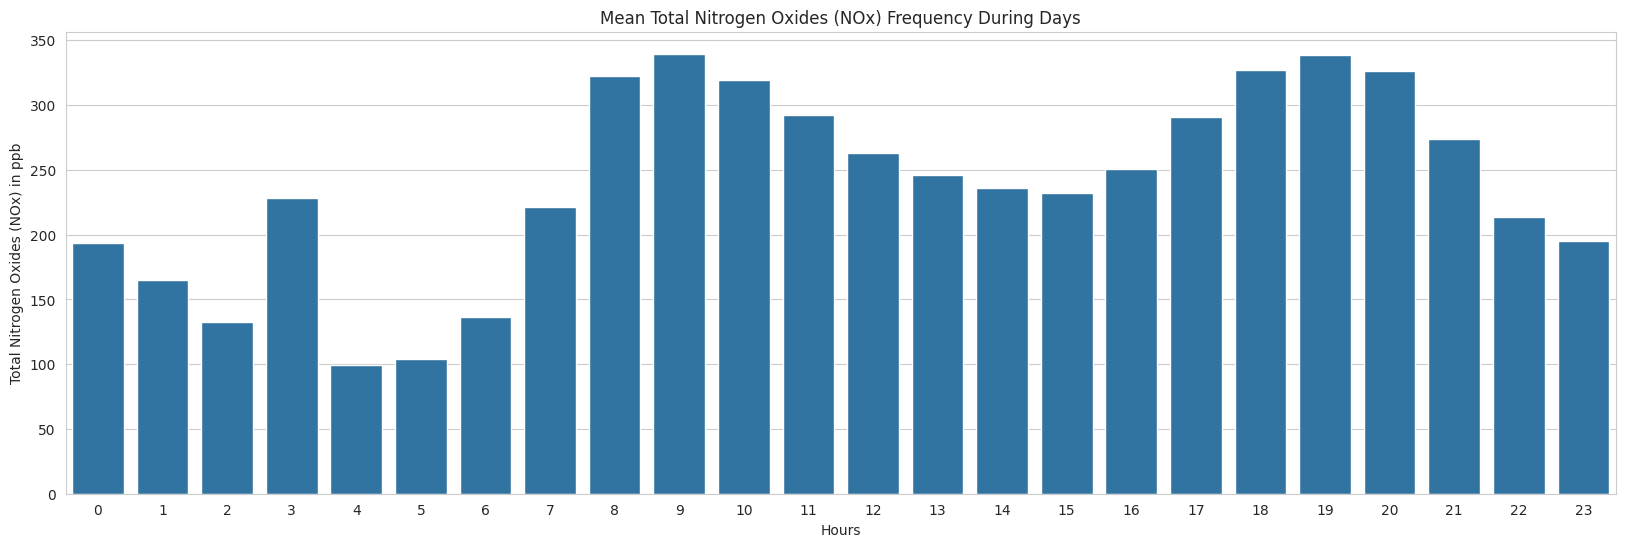

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")     #conclusion is in 9-11 am and 5-8 pm hour amount of this gases is maximum

Here, the graph shows an average of Oxides of Nitrogen level with hours. It seems during the day, its level is high compared to night because of high use of transportations, phones, other electronics etc.


The Environmental Protection Agency (EPA) set a 1-hour NOx standard at the level of 100 parts per billion (ppb). (Ref:
https://www.airnow.gov/index.cfm?action=pubs.aqiguidenox)

Here, this data shows, air has large amount of NOx compare to its standard measurement which is not good.

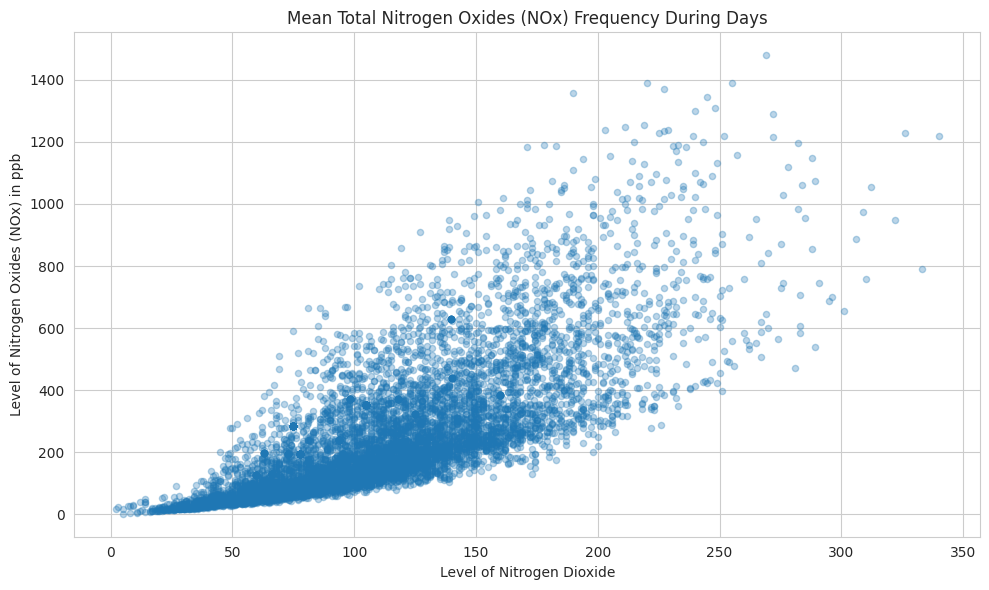

In [40]:

data.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

<Axes: >

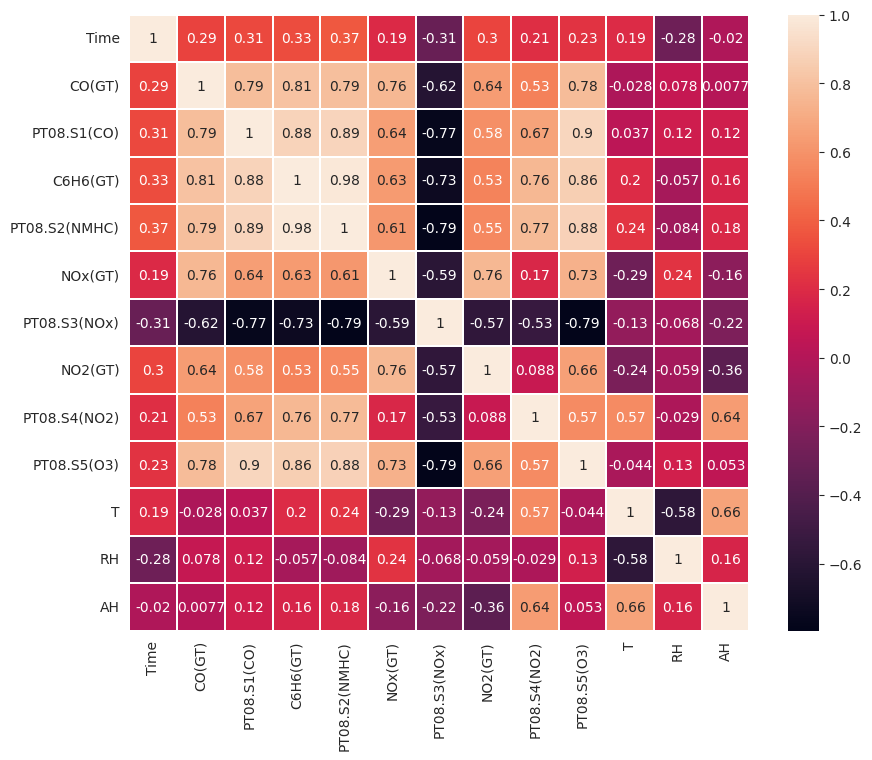

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.20)

## Training a Linear Regression Model
### X and y arrays

In [42]:
X = data.drop(['NOx(GT)','T','Time'], axis=1)

y= data['NOx(GT)']

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating and Training the Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [48]:
print(lm.intercept_)

-50.159845686671844


In [49]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


In [50]:
#From above coefficient values, we can say:
#a 1-unit increase in Nitrogen Dioxide (NO2) corresponds to an increase of about 1.48 units in NOx.
#A 1-unit increase in Benzene (C6H6) is associated with an increase of approximately 11.94 units in NOx.
#An increase of 1 unit in Relative Humidity (RH) results in an increase of around 2.27 units in NOx, assuming all other factors remain constant

## Prediction Model

In [51]:
y_prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

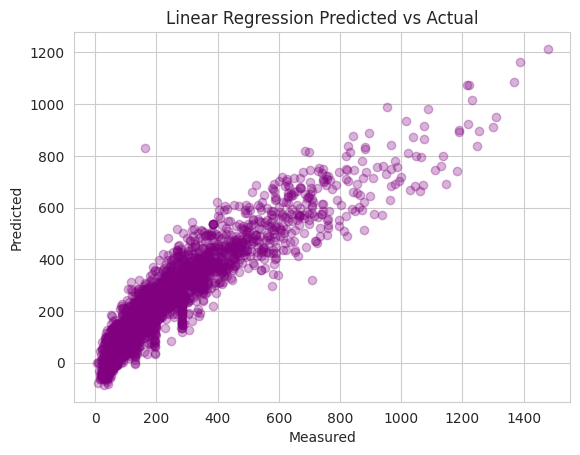

In [52]:
plt.scatter(y_test, y_prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [53]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8513856922248192

### Residualt Histogram

<ipython-input-56-e49ac42e03d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_prediction), bins=70, color="purple")


<Axes: xlabel='NOx(GT)', ylabel='Density'>

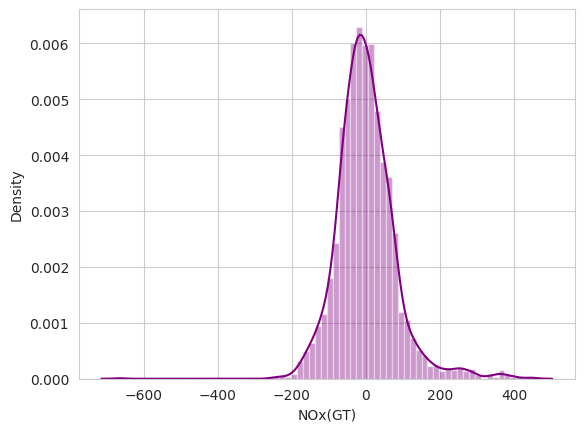

In [56]:
sns.distplot((y_test - y_prediction), bins=70, color="purple")

In [57]:
from sklearn import metrics

In [59]:
print('MAE:',metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:',metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE: 57.40341930660833
MSE: 6422.689290502262
RMSE: 80.1416826033885


In [60]:
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


If we hold all other varibles constant and 1 point increases in CO(GT), NOx will increase by 49.81.
Simillarly, If we hold all other varibles constant and 1 point increases in NO2(GT), NOx will increase by 1.48.
and, If we hold all other varibles constant and 1 point increases in C6H6(GT), NOx will increase by 11.94.

From our analysis of this air quality dataset, it is evident that NOx concentration (in ppb) increases due to several key pollution sources.
NOx gases are harmful both to human health and the environment. Without timely intervention, they can lead to serious consequences including respiratory illnesses and ecological damage.

However, several proven methods exist to reduce NOx emissions. Some effective initiatives include:

  - Switching to cleaner fuels: For example, using No. 2 oil instead of No. 6, or transitioning to distillate oils and natural gas, which produce lower NOx emissions.
  - Flue gas recirculation (FGR): This involves reusing waste gases from power plants by mixing them with combustion air.
    It reduces oxygen concentration and flame temperature at the burners, lowering NOx emissions by 30–60%.
  - Water injection and emulsification: This technique involves injecting water directly or mixing it with fuel to reduce combustion temperature, effectively lowering NOx emissions by 20–45%.